# Compstats
## Quickstart Guide

## Installing Compstats
First, we need to install CompStats. This can be easily done through pip, the Python package manager. Run the following command in your Python environment:

In [ ]:
try:
    import Compstats
except ImportError:
    !pip install Compstats

## Performance
After installing CompStats, we need to import the necessary libraries to start our analysis. CompStats relies on several Python libraries for data analysis and scientific computing. Make sure to load them before proceeding.

The first line imports two functions from the `CompStats` library. The `performance` function is used to calculate and analyze the performance of machine learning models. The `plot_performance` function, on the other hand, visualizes the performance metrics calculated by `performance`, such as accuracy or F1 score, along with confidence intervals to help in understanding the variability and reliability of the performance metrics. These functions are useful for evaluating and comparing the effectiveness of different models or algorithms.

The second line imports a variable `DATA` that refers to the path of a data file already included in the library.

The rest of the lines are libraries used in the examples.

In [31]:
from CompStats import performance, plot_performance
from CompStats.tests.test_performance import DATA
from sklearn.metrics import f1_score
import pandas as pd


Once we have set up our environment, we can start exploring what CompStats has to offer. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset named DATA,  preloaded in the library consisting of the comparison of six systems for a multiclass classification task using macro-averaged F1 score as the metric.

The first line loads the dataset, referenced by `DATA`. The line 2 calculates the weighted F1 score between two arrays: `y`, the true labels, and `hy`, the predicted labels, using scikit-learn's `f1_score` function. The `average='weighted'` parameter ensures that the F1 score is calculated for each label, and finds their average, weighted by the number of true instances for each label. The third line calculates the performance of models using the dataframe `df` and the previously defined score function, which computes the weighted F1 score. The result, `perf`, is a statistical analysis of model performance. The subsequent line generates a visualization of these performance metrics, including confidence intervals, to visually compare the effectiveness of different models or algorithms based on the calculated F1 scores.


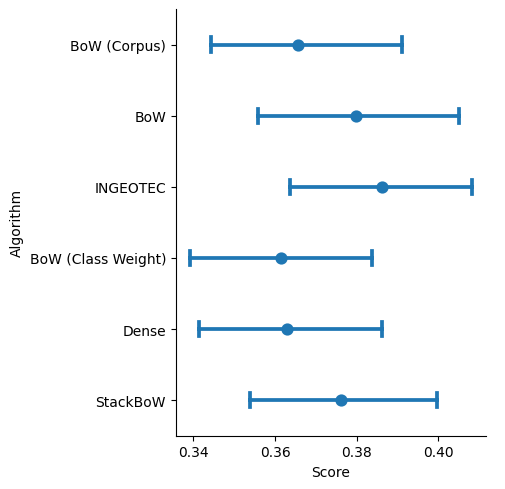

In [32]:
df = pd.read_csv(DATA)
score = lambda y, hy: f1_score(y, hy, average='weighted')
perf = performance(df, score=score)
ins = plot_performance(perf)

## Performance Comparison against the Winner

The first line of code imports three functions from the `CompStats` library: `performance`, `difference`, and `plot_difference`. These functions are designed for statistical analysis and visualization in Python, specifically for evaluating and comparing the performance of different models or machine learning algorithms. `performance` calculates performance metrics, `difference` assesses the differences in performance between models, and `plot_difference` visually represents these differences.

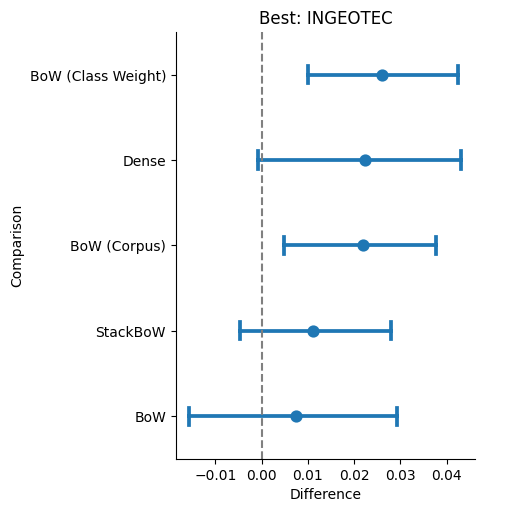

In [33]:
from CompStats import performance, difference, plot_difference
from CompStats.tests.test_performance import DATA
from sklearn.metrics import f1_score
import pandas as pd
df = pd.read_csv(DATA)
score = lambda y, hy: f1_score(y, hy, average='weighted')
perf = performance(df, score=score)
diff = difference(perf)
ins = plot_difference(diff)

From the previous graphs, for this example, we can observe that the ranking is *INGEOTEC*, *BoW*, *StackBoW*, *BoW (Corpus)*, *Dense*, *Bow (Class Weight)*. Hence, in the last graph, we analyze the performance difference compared against the winner (INGEOTEC). From this graph, we can conclude that *BoW*, *StackBoW*, and *Dense* might perform similarly to INGEOTEC.

Additionally, we can estimate the p-value associated with the hypothesis test $H_0: \theta_a \le \theta_b$ vs $H_1: \theta_a > \theta_b$ given the data, equivalently $H_0: \theta_a -  \theta_b\le 0$ vs $H_1: \theta_a - \theta_b > 0$. The p-values for these differences can be estimated using the following instruction, comparing them against the winner (INGEOTEC), to determine the probability that $a$ (INGEOTEC) is truly better than $b$.


In [34]:
from CompStats.measurements import difference_p_value
p_values = difference_p_value(diff)
p_values

{'BoW (Class Weight)': 0.004,
 'Dense': 0.018,
 'BoW (Corpus)': 0.008,
 'StackBoW': 0.104,
 'BoW': 0.282}

# Performance comparison between all models

Similarly, the p-value for the differences between all models can be estimated using the following instructions. This approach allows for a comprehensive analysis of how each model compares to the others, providing a statistical basis to understand the significance of performance variations among them. This method extends the comparative analysis, offering a detailed view of the competitive landscape of model performance.

In [35]:
from CompStats import all_differences, difference_p_value
all_diff = all_differences(perf)
p_values = difference_p_value(all_diff)
p_values

{'INGEOTEC - BoW': 0.282,
 'INGEOTEC - StackBoW': 0.104,
 'INGEOTEC - BoW (Corpus)': 0.008,
 'INGEOTEC - Dense': 0.018,
 'INGEOTEC - BoW (Class Weight)': 0.004,
 'BoW - StackBoW': 0.35,
 'BoW - BoW (Corpus)': 0.072,
 'BoW - Dense': 0.136,
 'BoW - BoW (Class Weight)': 0.032,
 'StackBoW - BoW (Corpus)': 0.114,
 'StackBoW - Dense': 0.13,
 'StackBoW - BoW (Class Weight)': 0.034,
 'BoW (Corpus) - Dense': 0.464,
 'BoW (Corpus) - BoW (Class Weight)': 0.266,
 'Dense - BoW (Class Weight)': 0.388}

In [59]:
import numpy as np
from statsmodels.stats.multitest import multipletests 
#multipletests(np.array(p_values.values()), method='hs')
#p_values2 = np.array(p_values.values())
#print(p_values2)
#print(type(p_values2))
print(np.array(list(p_values.values())).flatten())
temp = np.array(list(p_values.values())).flatten()
multipletests(temp, method='bonferroni')

[0.282 0.104 0.008 0.018 0.004 0.35  0.072 0.136 0.032 0.114 0.13  0.034
 0.464 0.266 0.388]


(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([1.  , 1.  , 0.12, 0.27, 0.06, 1.  , 1.  , 1.  , 0.48, 1.  , 1.  ,
        0.51, 1.  , 1.  , 1.  ]),
 0.0034137129465903193,
 0.0033333333333333335)